In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import umap
import hdbscan
np.random.seed(11)

In [90]:
conda install -c conda-forge hdbscan

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 22.11.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/arabi/anaconda3/envs/env

  added / updated specs:
    - hdbscan


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _libgcc_mutex-0.1          |      conda_forge           3 KB  conda-forge
    _openmp_mutex-4.5          |            2_gnu          23 KB  conda-forge
    hdbscan-0.8.29             |   py39h2ae25f5_1         632 KB  conda-forge
    libgcc-ng-12.2.0           |      h65d4601_19         931 KB  conda-forge
    libgomp-12.2.0             |      h65d4601_19         455 KB  conda-forge
    openssl-1.1.1s             |       h0b41bf4_1         1.9 MB  conda-forge
    --------------------------------------------------------

In [6]:
conda install -c conda-forge umap-learn

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 22.11.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/arabi/anaconda3/envs/env

  added / updated specs:
    - umap-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2022.9.24  |       ha878542_0         150 KB  conda-forge
    certifi-2022.9.24          |     pyhd8ed1ab_0         155 KB  conda-forge
    colorama-0.4.6             |     pyhd8ed1ab_0          25 KB  conda-forge
    libgcc-ng-11.2.0           |       h1234567_1         5.3 MB
    libgomp-11.2.0             |       h1234567_1         474 KB
    libllvm11-11.1.0           |       hf817b99_2        29.1 MB  conda-forge
    libstdcxx-ng-12.2.0        |      h46fd767_19         4.3 MB  conda-forge
    l

In [2]:
'''data = pd.read_csv("atussum_19-reduced.csv")
d2 = pd.DataFrame()
d2['TEAGE'] = data['TEAGE']
d2['TESEX'] = data['TESEX']

#d2['t01'] = data['t01']
d2['t02'] = data['t02']
#d2['t03'] = data['t03']
#d2['t04'] = data['t04']
d2['t05'] = data['t05']
#d2['t06'] = data['t06']
d2['t07'] = data['t07']
#d2['t08'] = data['t08']
#d2['t09'] = data['t09']
#d2['t10'] = data['t10']
d2['t11'] = data['t11']
d2['t12'] = data['t12']
#d2['t13'] = data['t13']
d2['t14'] = data['t14']
#d2['t15'] = data['t15']
#d2['t16'] = data['t16']
print(d2.describe())'''

'data = pd.read_csv("atussum_19-reduced.csv")\nd2 = pd.DataFrame()\nd2[\'TEAGE\'] = data[\'TEAGE\']\nd2[\'TESEX\'] = data[\'TESEX\']\n\n#d2[\'t01\'] = data[\'t01\']\nd2[\'t02\'] = data[\'t02\']\n#d2[\'t03\'] = data[\'t03\']\n#d2[\'t04\'] = data[\'t04\']\nd2[\'t05\'] = data[\'t05\']\n#d2[\'t06\'] = data[\'t06\']\nd2[\'t07\'] = data[\'t07\']\n#d2[\'t08\'] = data[\'t08\']\n#d2[\'t09\'] = data[\'t09\']\n#d2[\'t10\'] = data[\'t10\']\nd2[\'t11\'] = data[\'t11\']\nd2[\'t12\'] = data[\'t12\']\n#d2[\'t13\'] = data[\'t13\']\nd2[\'t14\'] = data[\'t14\']\n#d2[\'t15\'] = data[\'t15\']\n#d2[\'t16\'] = data[\'t16\']\nprint(d2.describe())'

In [2]:
data = pd.read_csv("atussum_19-reduced.csv")
print(len(data))
data = data.dropna()
print(len(data))
print(data.dtypes)

'''agelim = []
for ind in data.index:
    if data['TEAGE'][ind] >= 15 and data['TEAGE'][ind] <= 55:
        agelim.append(0)
    
    else:
        agelim.append(2)
data['agelim'] = agelim

hh = []
for ind in data.index:
    if data['t02'][ind] >= 0 and data['t02'][ind] <= 15:
        hh.append(0)

    elif data['t02'][ind] > 15 and data['t02'][ind] <= 75:
        hh.append(1)

    elif data['t02'][ind] > 75 and data['t02'][ind] <= 180:
        hh.append(2)
    
    else:
        hh.append(3)
data['hh'] = hh

work = []
for ind in data.index:
    if data['t05'][ind] >= 0 and data['t05'][ind] <= 150:
        work.append(0)

    elif data['t05'][ind] > 150 and data['t05'][ind] <= 400:
        work.append(1)
    
    else:
        work.append(2)
data['work'] = work

con = []
for ind in data.index:
    if data['t07'][ind] >= 0 and data['t07'][ind] <= 30:
        con.append(0)

    elif data['t07'][ind] > 30 and data['t07'][ind] <= 70:
        con.append(1)
    
    else:
        con.append(2)
data['con'] = con

eat = []
for ind in data.index:
    if data['t11'][ind] >= 0 and data['t11'][ind] <= 30:
        eat.append(0)

    elif data['t11'][ind] > 30 and data['t11'][ind] <= 60:
        eat.append(1)

    elif data['t11'][ind] > 60 and data['t11'][ind] <= 90:
        eat.append(2)
    
    else:
        eat.append(3)
data['eat'] = eat

social = []
for ind in data.index:
    if data['t12'][ind] >= 0 and data['t12'][ind] <= 135:
        social.append(0)

    elif data['t12'][ind] > 135 and data['t12'][ind] <= 270:
        social.append(1)

    elif data['t12'][ind] > 270 and data['t12'][ind] <= 450:
        social.append(2)
    
    else:
        social.append(3)
data['social'] = social

religious = []
for ind in data.index:
    if data['t14'][ind] >= 0 and data['t14'][ind] <= 10:
        religious.append(0)
    
    elif data['t14'][ind] > 10 and data['t14'][ind] <= 60:
        religious.append(1)

    else:
        religious.append(2)
data['religious'] = religious'''

9435
9435
TUCASEID        int64
GEMETSTA        int64
GTMETSTA        int64
PEEDUCA         int64
PEHSPNON        int64
PTDTRACE        int64
TEAGE           int64
TELFS           int64
TEMJOT          int64
TESCHENR        int64
TESCHLVL        int64
TESEX           int64
TESPEMPNOT      int64
TRCHILDNUM      int64
TRDPFTPT        int64
TRERNWA         int64
TRHOLIDAY       int64
TRSPFTPT        int64
TRSPPRES        int64
TRYHHCHILD      int64
TUDIARYDAY      int64
TUFNWGTP      float64
TEHRUSLT        int64
TUYEAR          int64
TU20FWGT      float64
t01             int64
t02             int64
t03             int64
t04             int64
t05             int64
t06             int64
t07             int64
t08             int64
t09             int64
t10             int64
t11             int64
t12             int64
t13             int64
t14             int64
t15             int64
t16             int64
t18             int64
t50             int64
dtype: object


"agelim = []\nfor ind in data.index:\n    if data['TEAGE'][ind] >= 15 and data['TEAGE'][ind] <= 55:\n        agelim.append(0)\n    \n    else:\n        agelim.append(2)\ndata['agelim'] = agelim\n\nhh = []\nfor ind in data.index:\n    if data['t02'][ind] >= 0 and data['t02'][ind] <= 15:\n        hh.append(0)\n\n    elif data['t02'][ind] > 15 and data['t02'][ind] <= 75:\n        hh.append(1)\n\n    elif data['t02'][ind] > 75 and data['t02'][ind] <= 180:\n        hh.append(2)\n    \n    else:\n        hh.append(3)\ndata['hh'] = hh\n\nwork = []\nfor ind in data.index:\n    if data['t05'][ind] >= 0 and data['t05'][ind] <= 150:\n        work.append(0)\n\n    elif data['t05'][ind] > 150 and data['t05'][ind] <= 400:\n        work.append(1)\n    \n    else:\n        work.append(2)\ndata['work'] = work\n\ncon = []\nfor ind in data.index:\n    if data['t07'][ind] >= 0 and data['t07'][ind] <= 30:\n        con.append(0)\n\n    elif data['t07'][ind] > 30 and data['t07'][ind] <= 70:\n        con.appe

In [18]:
#np.random.seed(11)
reducer = umap.UMAP(n_neighbors=3,metric='cosine', n_components=2,min_dist=0.0, random_state=1)
p_data = data[
    [
        "t01",
        "t02",
        "t03",
        "t04",
        "t05",
        "t06",
        "t07",
        "t08",
        "t09",
        "t10",
        "t11",
        "t12",
        "t13",
        "t14",
        "t15",
        "t16",
    ]
].values
scaled_data = StandardScaler().fit_transform(p_data)
embedding = reducer.fit_transform(scaled_data)
embedding.shape

(9435, 2)

No handles with labels found to put in legend.


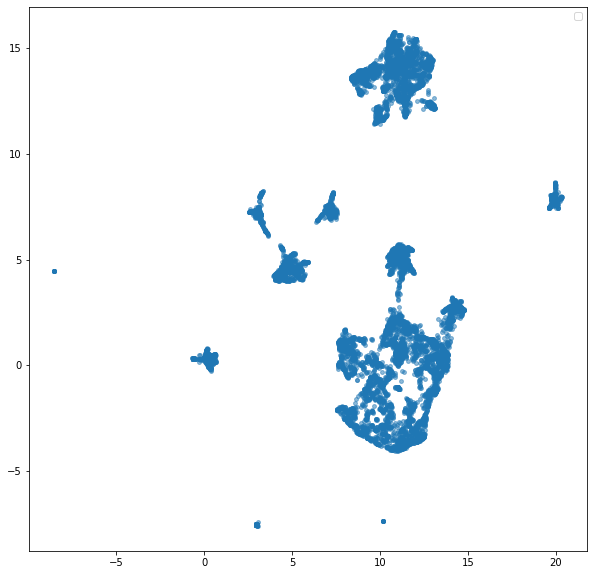

TUCASEID        int64
GEMETSTA        int64
GTMETSTA        int64
PEEDUCA         int64
PEHSPNON        int64
PTDTRACE        int64
TEAGE           int64
TELFS           int64
TEMJOT          int64
TESCHENR        int64
TESCHLVL        int64
TESEX           int64
TESPEMPNOT      int64
TRCHILDNUM      int64
TRDPFTPT        int64
TRERNWA         int64
TRHOLIDAY       int64
TRSPFTPT        int64
TRSPPRES        int64
TRYHHCHILD      int64
TUDIARYDAY      int64
TUFNWGTP      float64
TEHRUSLT        int64
TUYEAR          int64
TU20FWGT      float64
t01             int64
t02             int64
t03             int64
t04             int64
t05             int64
t06             int64
t07             int64
t08             int64
t09             int64
t10             int64
t11             int64
t12             int64
t13             int64
t14             int64
t15             int64
t16             int64
t18             int64
t50             int64
embed_x       float32
embed_y       float32
cluster   

In [15]:
fig = plt.figure(figsize=(10,10))
c = []
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    s = 15,
    alpha = 0.5,
    #c=[sns.color_palette()[x] for x in data.hh])
)


plt.legend()
plt.show()
data['embed_x'] = embedding[:, 0]
data['embed_y'] = embedding[:, 1]
print(data.dtypes)
fig.savefig("embed_3.png")

In [5]:
#clusterer = hdbscan.RobustSingleLinkage(cut = 0.50)
np.random.seed(11)
clusterer = hdbscan.HDBSCAN(min_cluster_size=40)
cluster_labels = clusterer.fit_predict(embedding)
print(cluster_labels)
data['cluster'] = cluster_labels
print(data['cluster'].max())
#clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

[11 24 -1 ...  4 13 11]
27


No handles with labels found to put in legend.


28


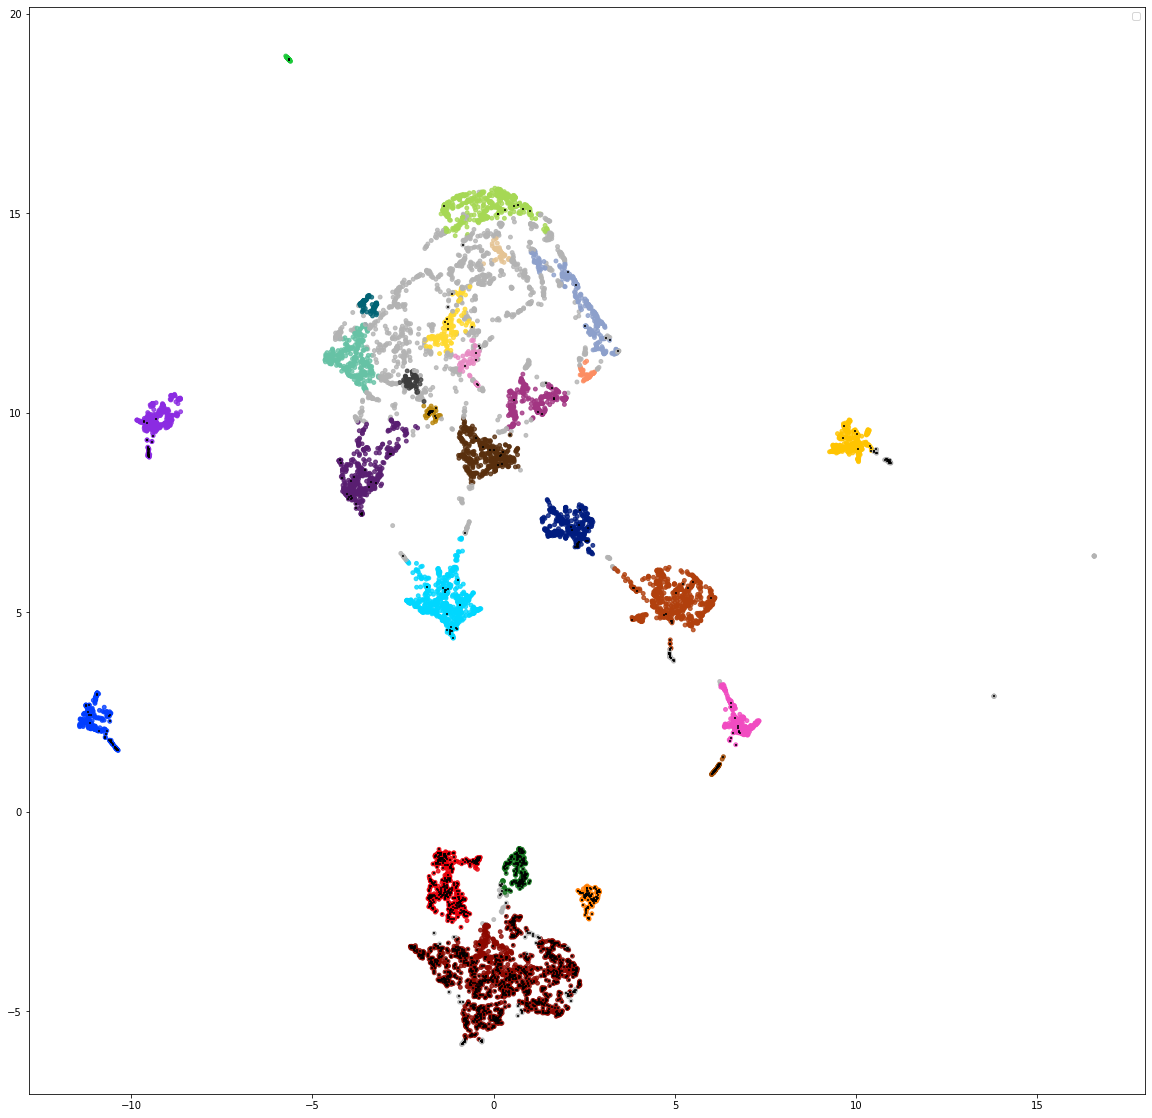

In [6]:
#palette = itertools.cycle(sns.color_palette())
fig = plt.figure(figsize=(20,20))
c1 = sns.color_palette("bright")
c2 = sns.color_palette("dark")
c3 = sns.color_palette("Set2")
#print(c1)
x = c1 + c2 + c3
print(len(x))
plt.scatter(
    data['embed_x'],
    data['embed_y'],
    s = 15,
    alpha = 0.8,
    
    #c=[sns.color_palette("Set3")[x] for x in data.cl])
    c = [x[i] for i in data.cluster])

d1 = data[data['t05'] >= 100]
d1 = d1[d1['t02'] <= 100]
plt.scatter(
    d1['embed_x'],
    d1['embed_y'],
    s = 8,
    alpha = 0.8,
    c='black',
    marker='+')

plt.legend()
plt.show()


In [7]:
data.to_csv("atus_embed_cluster.csv", index = False)